1. Implement K-means in Python using Sklearn

We implement the necessary libreries that will help us create the graphics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

We import the necessary file. If the file is in the same location as the ".ipynb" then we only need to add the name of the file, otherwise we need the full path of the file.

Also using ".head()" we can see the first 5 entries of the dataframe.

In [2]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


We can see basic statistic information of our dataframe.

The chart is showing us the there are 9 categories within the dataframe.

In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


Each of the 9 categories represents a diferent work activity: singer, actor, politician, sports player, etc...

We see how many people are registered within each category.

In [4]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


2. Visualising Data

We use the "category" column to get an idea of their dispersion in a graphic view.

Each plot gives us a diferent column in relation to what information they have in "category".

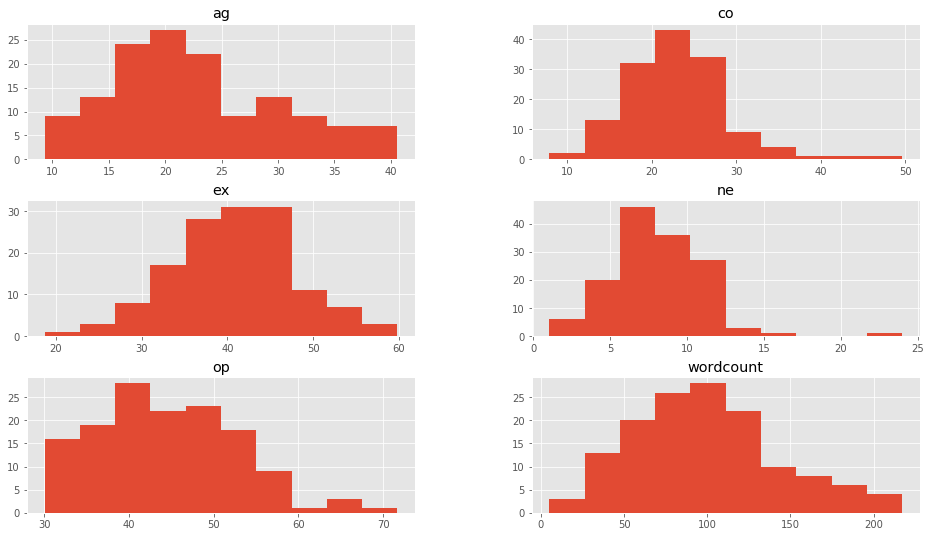

In [5]:
dataframe.drop(['categoria'],1).hist()
plt.show()

Now we select 3 dimensions, in this case we will use the following: op, ex and ag and cross them to see if they give us any clue of their grouping and the relationship with their categories.

Reviewing the graphic, it does not appear that there is any type of grouping or correlation between the users and their categories.

It is important to note that when an attribute is compared with itself it becomes a histogram.

C:\Users\Andrei Niculae\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


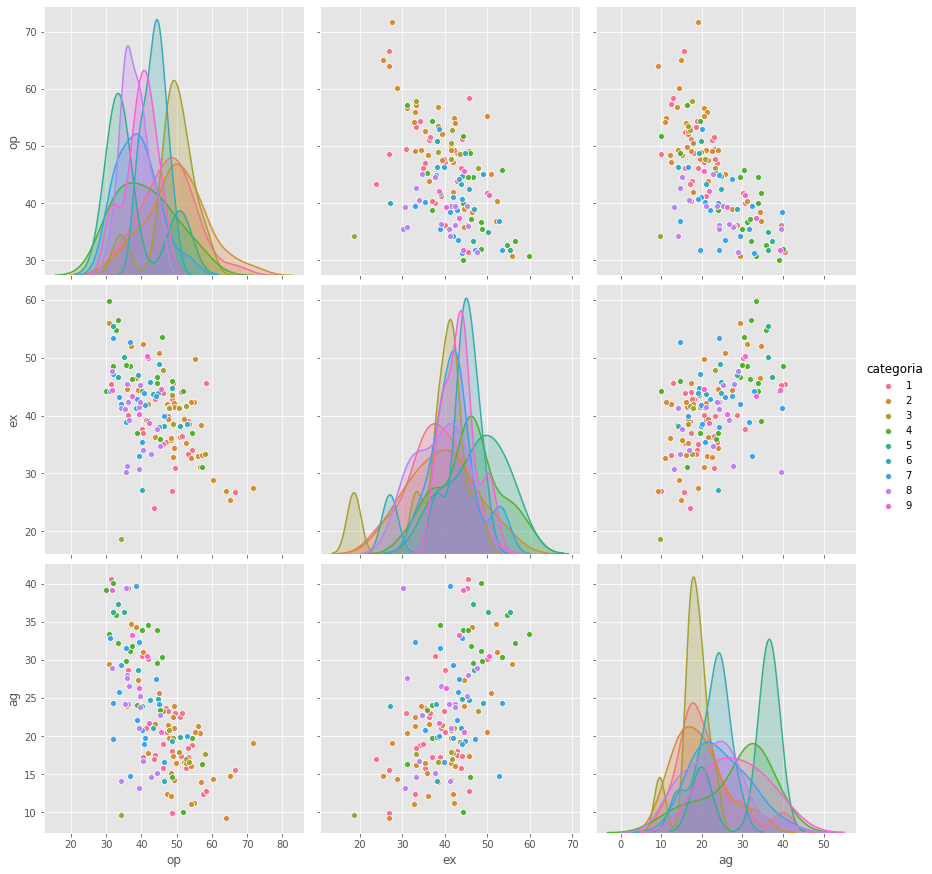

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

3. Defining the entry

We specify the data structure that we use to feed the algorithm. As you can see, we only load the columns op, ex and ag in our variable X.

In [7]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Now we will see a 3D graph with 11 colors representing the categories.

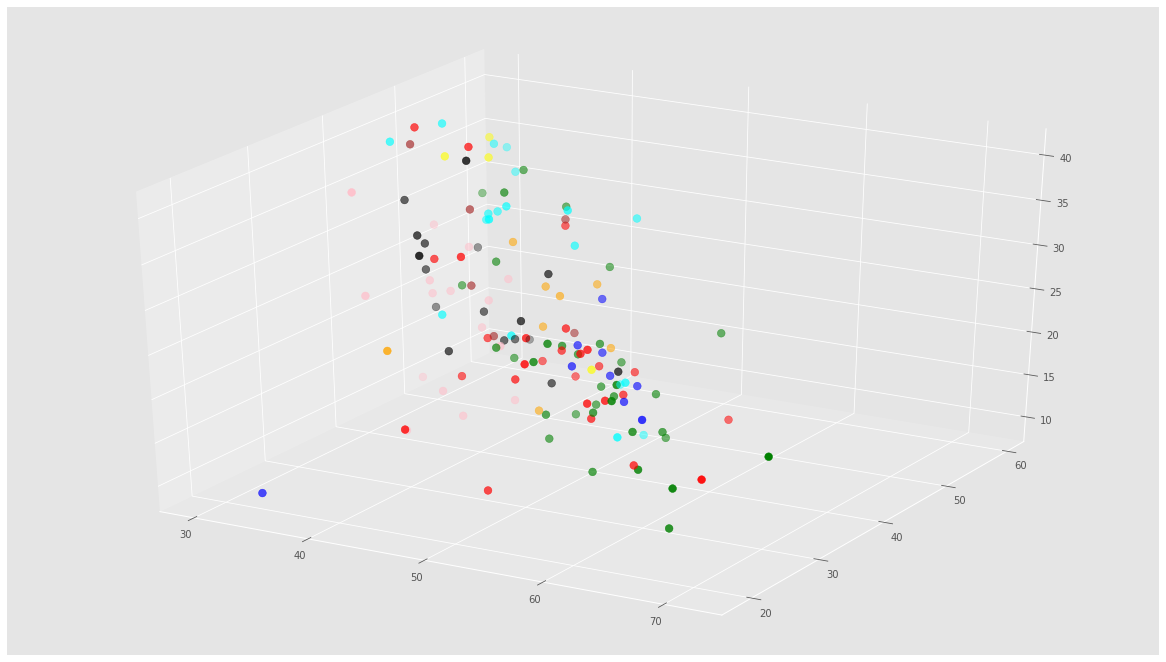

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

4. Get value of K

We will see if with K-means, we can “paint” this same graph in another way, with differentiated clusters.

We are going to find the value of K by making a graph and trying to find the "cubit point" that we discussed earlier. This is our result:

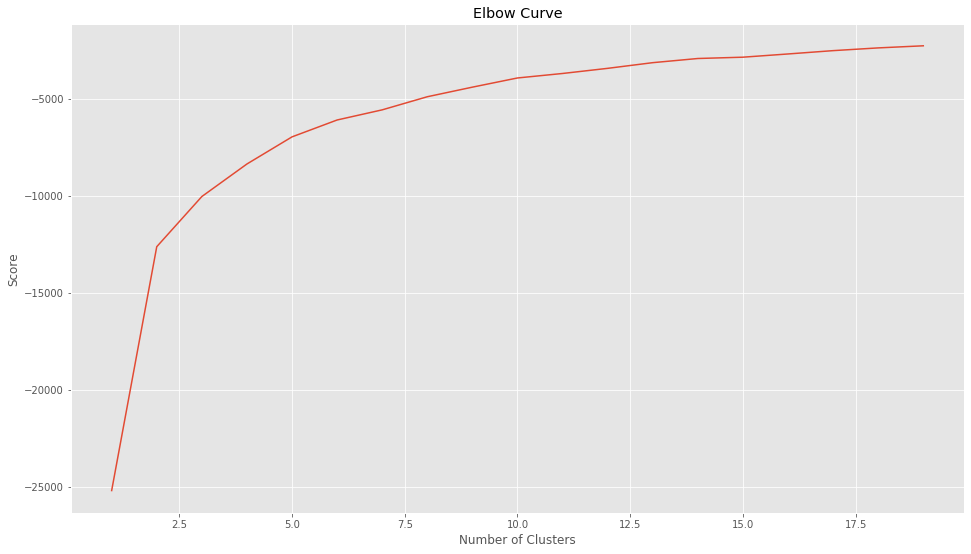

In [9]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

5. Executing K-Means

We run the algorithm for 5 clusters and obtain the labels and centroids.

Actually the curve of the previous exercise is quite "smooth". 5 can be a good number for K.

In [10]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.75925435 32.7509888  21.08881555]
 [40.14744474 43.54690971 23.11790265]
 [50.42588653 40.66723528 17.30892462]
 [35.90241306 47.56828232 33.58748762]
 [58.70462307 30.53566167 15.72207033]]


Now we will see this in a 3D graph with colors for the groups and we will see if they differ, the stars mark the center of each cluster:

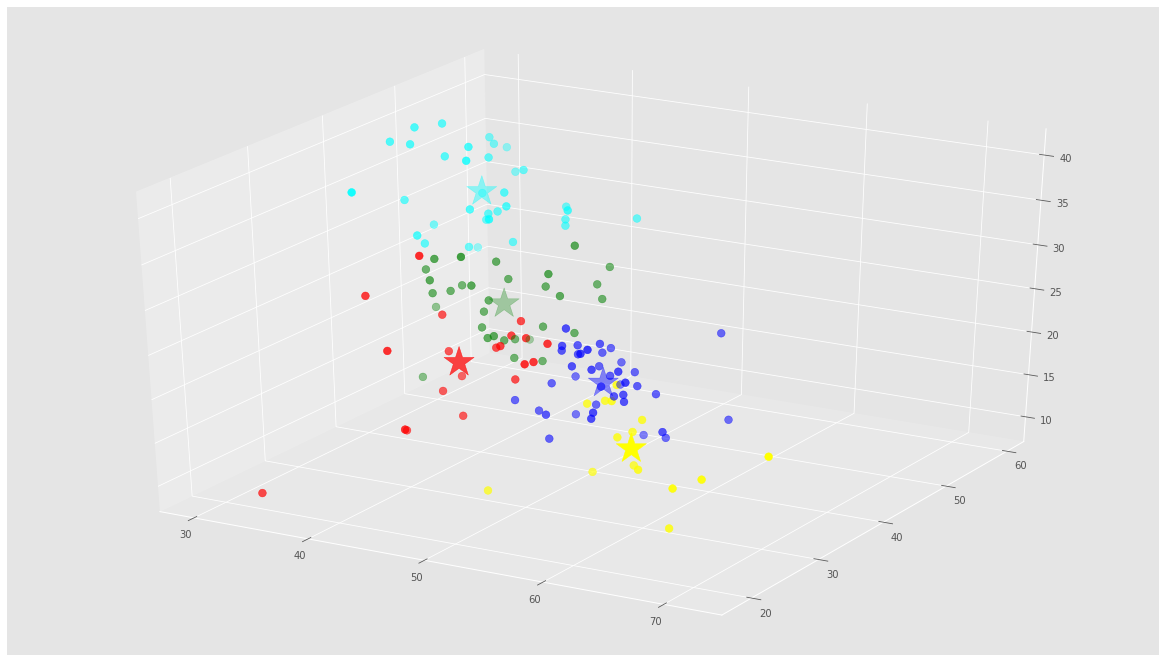

In [11]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Here we can see that the K-Means Algorithm with K = 5 has grouped the 140 Twitter users by their personality, taking into account the 3 dimensions we use: Openess, Extraversion and Agreeablenes. It seems that there is not necessarily a relationship in the groups with their Celebrity activities.

We will make 3 2-dimensional graphs with the projections from our 3D graph to help us visualize the groups and their classification:

1st graph:

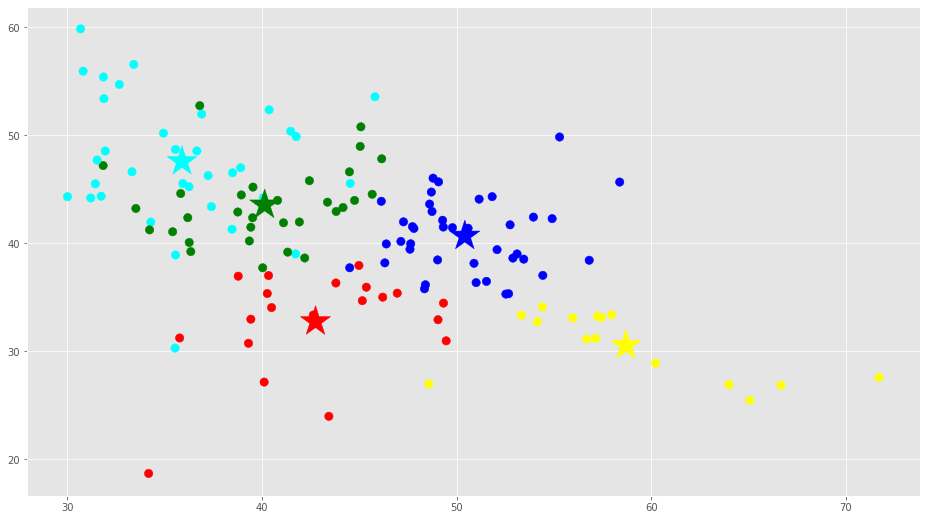

In [12]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

2nd graph:

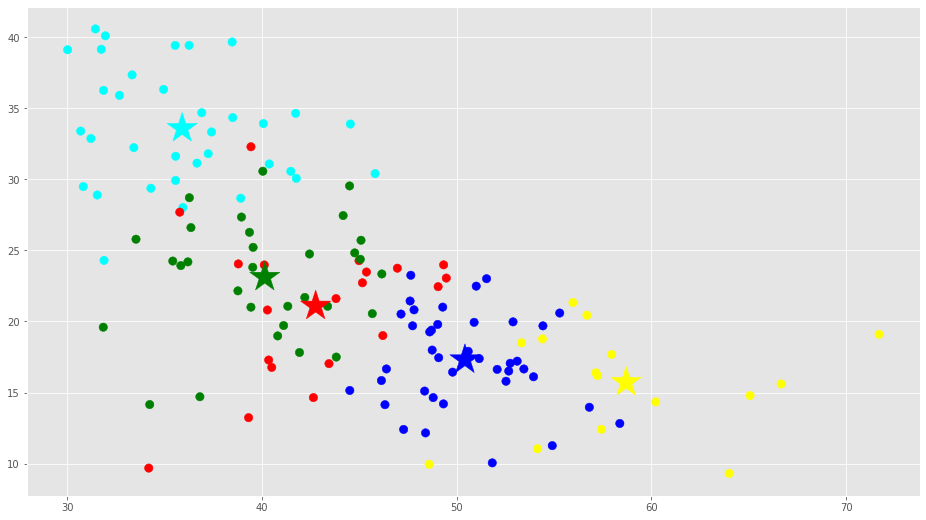

In [13]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

3rd graph:

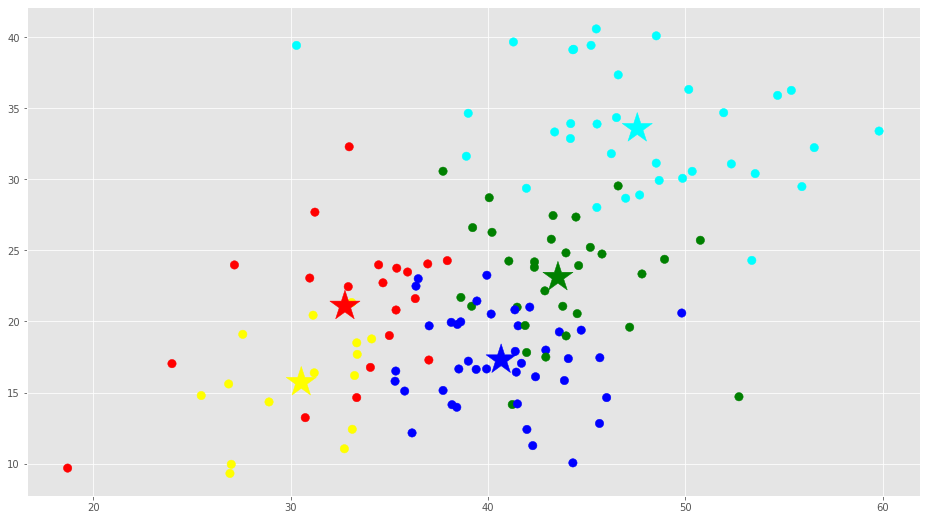

In [14]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In these graphs we see that the groups are quite well differentiated, and we can see in each of the clusters how many users it has:

In [15]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,20
1,green,31
2,blue,40
3,cyan,34
4,yellow,15


Now we can see the diversity in labor areas of each one. For example, in group 0 (in this case red), we see that there are all work activities although activity 1 and 2 predominate, corresponding to Actors and Singers with 11 and 15 celebrities.

In [16]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,NaN


We will look for the users that are closest to the centroids of each group that we could say have the characteristic personality traits that represent each cluster:

In [17]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([120,  64,  21,  98,  82], dtype=int64)

In the centers we see that we have a model, a politician, a TV presenter, a radio host and an athlete.

In [18]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
ierrejon
carmenelectra
maria_patino
JudgeJudy


6. Classify new samples

And finally we can group and tag new twitter users with their characteristics and classify them. We see the example with David Guetta's user and it returns that he belongs to group 1 (in this case green).

In [19]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

[1]


In conclusion the K-means algorithm will help us create clusters when we have large groups of unlabeled data, when we want to try to discover new relationships between features or to test or decline hypotheses that we have about our business.

Preguntas:
1. Com es calculen els centroids dels clústers?

2. Quantes iteracions cal realitzar per trobar-lo?

3. Què és l’Elbow curve?

4. Com es determina el nombre de clústers o agrupaments (k)?

Respuestas:
1. A centroid is calculated by locating the mid point of each graph/grouping.

2. Normally there needs to be a minimum of at least 2 iterations in order to find the centroids of a cluster.

3. The Elbow Curve is a method that is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

4. One way of determening the number of clusters is by using "Elbow Curve". The way it works is the following:

-Computes the clustering algorithm for different values of k. For instance, by varying k from 1 to 10 clusters.

-For each k, calculate the total within-cluster sum of square.

-Plot the curve of square according to the number of clusters k.

-The location of a curve in the plot is generally considered as an indicator of the appropriate number of clusters.